# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2021</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al **ejercicio 2**. Hay un notebook por ejercicio planteado.


* [Ejercicio 2 - GMM](#Ejercicio2) (35 puntos)

# Importar bibliotecas

In [1]:
# Se importan las bibliotecas que se utilizarán
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import pairwise_distances
from sklearn.datasets import load_digits

from scipy.stats import multivariate_normal

from fuaa_utils_ej2 import evaluar_kernel_gaussiano
from fuaa_utils_ej2 import generar_datos
from fuaa_utils_ej2 import generar_muestras_gaussiana_multivariada
from fuaa_utils_ej2 import identificar_parcial
from fuaa_utils_ej2 import inicializar_mezcla
from fuaa_utils_ej2 import log_verosimilitud
from fuaa_utils_ej2 import maximization_step
from fuaa_utils_ej2 import plot_digits
from fuaa_utils_ej2 import plot_gmm
from fuaa_utils_ej2 import plot_scatter
from fuaa_utils_ej2 import validar_resultado

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

identificar_parcial()

Usuario julian.o.flaherty en pcunix152.fing.edu.uy.


<a id="Ejercicio2"></a>
# Modelos de Mezclas de Gaussianas

Un Modelo de Mezcla Gaussianas (GMM) intenta encontrar una mezcla de distribuciones de probabilidad gaussianas multidimensionales que modelen un conjunto de datos de entrada. En el caso más sencillo, los GMM pueden utilizarse para encontrar clusters de la misma forma que con *k*-means.

El objetivo de la primera parte de este ejercicio es evaluar el ajuste de modelos de Mezcal de Gaussianas. Los parámetros se estimarán mediante la implementación de un esquema de Expectation-Maximization (EM) para encontrar los parámetros que maximizan la verosimilitud del modelo Mezcla de Gaussianas para un conjunto de datos $X$. 

Si se utilizan ${N_g}$ componentes en la mezcla, el modelo está dado por:
$$p(\mathbf{x_n|\Theta})=\sum_{j=1}^{N_g} w_j \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_j},\mathbf{\Sigma_j} \right)$$ donde $\mathcal{N}$ es una Gaussiana, $w_i$, $\mu_i$ y $\Sigma_i$ son, respectivamente, el peso en la mezcla, la media y la matriz de covarianza de la $i$-ésima Gaussiana, y $\Theta$ representa los parámetros de la mezcla.

Se implementarán funciones utilizando el esquema EM para encontrar los parámetros óptimos en el caso de Mezcla de Gaussianas. El esquema sigue los siguientes pasos:

- Inicialización
- Loop donde se calculan:
    - *Expectation Step* (Parte (a))
    - *Maximization Step* 
    - Se evalúa condición de continuidad en el loop (Parte (b))
- Ajuste de GMM a datos sintéticos (Parte (c))
- Análisis cualitativo de los ajustes (Parte (d))

## Generación y visualización de los datos

Se generan y visualizan datos sintéticos.

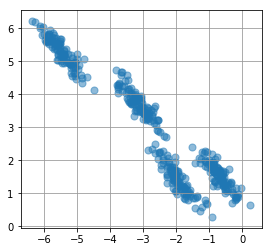

In [2]:
# Generar datos.
X = generar_datos()
plot_scatter(X[:, 0], X[:, 1])

## Inicialización

Se provee la función `inicializar_mezcla()` que es la encargada de inicializar las medias $\mathbf{\mu_j}$, las covarianzas $\mathbf{\Sigma_j}$ y los coeficientes $\mathbf{w}$ de la mezcla . La inicialización de los $\mathbf{\mu_j}$ es como ${k}$ vectores de $X$ elegidos aleatoriamente. 

La función `inicializar_mezcla()` tiene la siguiente definición:
<pre>
def inicializar_mezcla(X, Ng, semilla):
    '''
    Entrada:
        X: matriz de tamaño (N,d) que contiene N muestras, una por fila.
        Ng: número de clusters a encontrar.
    Salida:
        w: arreglo de largo Ng que contiene los pesos de la mezcla. 
           Se deben inicializar a valores aleatorios cuya suma sea 1.
        mus: arreglo de tamaño (Ng,d) que contiene los pesos.
        sigmas: arreglo de tamaño (Ng,d,d) que contiene las matrices de 
                covarianza de los clusters
    '''
</pre>

## Parte (a): Expectation step

Implementar `expectation_step()`. Se calcula la probabilidad de que la *n-ésima* muestra haya sido generada por la componente *j-ésima* de la mezcla. Para ello se utilizan los parámetros actuales   

$$
\gamma_{nj} = \frac{w_j \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_j},\mathbf{\Sigma_j} \right)}{\sum_{l=1}^{L} w_l \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_l},\mathbf{\Sigma_l} \right)} 
$$

**Sugerencia:** Para la evaluación de una Gaussiana en un punto se sugiere analizar el método `multivariate_normal.pdf()` de `scipy.stats` que ya fue importado y está disponible.

In [3]:
def expectation_step(X, w, mus, sigmas):
    '''
    Entrada:
        X: matriz de tamaño Nxd con las muestras a evaluar.
        w: vector de largo k que contiene los pesos de la mezcla. 
        mus: arreglo de tamaño (k,d) que contiene las k medias.
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de 
                covarianza de los clusters.
    Salida:
        gammas: matriz de tamaño Nxk con las probabilidades de pertenencia a 
                cada cluster.
    '''
    
    multivariate_normal()

    N, d = X.shape
    k = len(w)
    
    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    
    gammas = np.empty((N,k))
    for i in range(N):
        for j in range(k):
            gammas[i,j] = w[j]*multivariate_normal(mean=mus[j], cov=sigmas[j]).pdf(X[i])
        gammas[i] = gammas[i] / np.sum(gammas[i])
    
    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return gammas

In [4]:
# Se testea expectation_step()
validar_resultado('expectation_step', funcion=expectation_step)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Probabilidades de pertenencia a cada cluster validadas.
+-------------------------------------------------------------------------+


## Maximization step

Se provee la función `maximization_step()`. Se encuentran los parámetros óptimos utilizando la distribución de $\gamma_{nj}$ actual
\begin{align*}
&N_j                       = \sum_{n=1}^{N}\gamma_{nj} \\
&\mathbf{\mu_j^{new}}      = \frac{1}{N_j}\sum_{n=1}^{N}\gamma_{nj}\mathbf{x_n}  \\
&\mathbf{\Sigma_j^{new}}   = \frac{1}{N_j}\sum_{n=1}^{N}\gamma_{nj}\left(\mathbf{x_n}-\mathbf{\mu_j}\right)\left(\mathbf{x_n}-\mathbf{\mu_j}\right)^T  \\
&w_j^{new}               = \frac{N_j}{N} \\
\end{align*}
La función `maximization_step()` tiene la siguiente definición:
<pre>
def maximization_step(X, gammas):
    '''
    Entrada:
        X: matriz de tamaño Nxd con las muestras a evaluar.
        gammas: arreglo de tamaño (N,k) con las probabilidades de pertenencia 
                a cada cluster.
        
    Salida:
        w: vector de pesos de la mezcla.
        mus: arreglo de tamaño (k,d) que contiene las medias en el paso 
             actual.
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de 
                covarianza de los clusters en el paso actual.    
    '''
</pre>

## Parte (b): Loop EM

Completar la implementación de `gmm_EM`. Para ello utilizar las implementaciones de las partes anteriores de forma de maximizar la verosimilitud del modelo.

Para el cálculo de la verosimilitud se puede utilizar la función `log_verosimilitud()` que tiene la siguiente definición:

<pre>
def log_verosimilitud(X, w, mus, sigmas):
    '''
    Entrada:
        X: matriz de tamaño Nxd que contiene las muestras.
        w: arreglo de tamaño k que contiene los pesos actuales.
        mus: arreglo de tamaño (k,d) que contiene las medias, una por fila.
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza.
     Salida:
        log_ver: logaritmo de la verosimilitud de las muestras con el modelo.
    '''
</pre>

In [5]:
def gmm_EM(X, Ng, tol=0.01, max_iter=100, semilla=2):
    '''
    Entrada:
        X: matriz de tamaño Nxd que contiene N muestras, una por fila
        Ng: número de componentes.
        tol: si la log verosimilitud en el paso actual no mejora al menos 
             <tol> respecto a la del paso anterior se termina la optimización.
        max_iter: máximo número de iteraciones en la optimización.
        semilla: semilla a utilizar en la inicialización de las gaussianas.
        
    Salida:
        gmm: Diccionario con las siguientes claves:
            log_ver: lista que almacena las log-verosimilitudes calculadas 
                     durante la optimización.
            probs: matriz de tamaño Nxk con las probabilidades de pertenencia 
                   a cada cluster.
            weights: vector de tamaño k que contiene los pesos estimados.
            means: matriz de tamaño (k,d) que contiene las medias, una por 
                   fila.
            covars: arreglo de tamaño (k,d,d) que contiene las matrices de 
                    covarianza.
    '''
    N, d = X.shape
    
    w, mus, sigmas = inicializar_mezcla(X, Ng, semilla)
    w0, mus0, sigmas0 = w, mus, sigmas
    
    log_ver_previa = -np.infty
    log_ver = []  # Almacena las log-verosimilitudes durante la optimización.

    termino = False
    n_iter = 0
    print('+------+-------------------+')
    print('| iter | log verosimilitud |')
    print('+------+-------------------+')
    while not termino:

        #####################################################
        ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

        # E-step
        probs = expectation_step(X, w, mus, sigmas) 

       
        # M-step
        w, mus, sigmas = maximization_step(X, probs)

        
        # se actualiza la log verosimilitud
        log_ver_actual = log_verosimilitud(X, w, mus, sigmas)

        
        # se evalúa condición de terminación (dos condiciones)
        termino = (n_iter > max_iter) or (log_ver_actual-log_ver_previa < tol)
        
        
        #####################################################
        ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

        log_ver.append(log_ver_actual)
        log_ver_previa = log_ver_actual
        n_iter += 1
        print('| %3d  |      %8.2f     |' % (n_iter, log_ver_actual))

    print('+------+-------------------+')

    gmm = {
        "log_ver": log_ver,
        "means": mus,
        "covars": sigmas,
        "weights": w,
        "probs": probs
    }
    
    return gmm

## Parte (c): Ajuste modelo GMM

Realizar el ajuste de un modelo GMM a los datos en `X` con `Ng` gaussianas, variando `Ng` entre 2 y 6, inclusive. Completar una tabla como la siguiente:

| Número de componentes | Log verosimilitud | Número de iteraciones |
| --- | --- | --- |
| 2 |  |  |
| ... |  |  |
| 6 |  |  |


Para la clasificación se le asigna a cada elemento de `X` como etiqueta un entero entre 0 y Ng-1 correspondiente al índice de la Gaussiana que le asigna mayor probabilidad.

**Respuesta**:

| Número de componentes | Log verosimilitud | Número de iteraciones |
| --- | --- | --- |
| 2 | -959.95 | 7 |
| 3 | -775.14 | 18 |
| 4 | -623.84  | 22 |
| 5 | -616.24  | 32 |
| 6 | -597.03 | 39 |

Ajuste de GMM con 2 gaussianas.
+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |      -1067.12     |
|   2  |      -1028.47     |
|   3  |       -990.91     |
|   4  |       -961.04     |
|   5  |       -959.98     |
|   6  |       -959.95     |
|   7  |       -959.95     |
+------+-------------------+


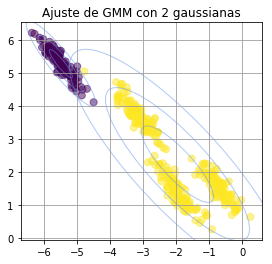

Ajuste de GMM con 3 gaussianas.
+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |      -1065.43     |
|   2  |      -1024.73     |
|   3  |       -980.48     |
|   4  |       -940.70     |
|   5  |       -926.28     |
|   6  |       -912.54     |
|   7  |       -901.00     |
|   8  |       -891.29     |
|   9  |       -882.26     |
|  10  |       -873.18     |
|  11  |       -863.20     |
|  12  |       -850.74     |
|  13  |       -832.38     |
|  14  |       -802.79     |
|  15  |       -778.95     |
|  16  |       -775.20     |
|  17  |       -775.14     |
|  18  |       -775.14     |
+------+-------------------+


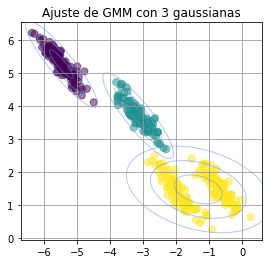

Ajuste de GMM con 4 gaussianas.
+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |      -1044.82     |
|   2  |       -989.67     |
|   3  |       -921.27     |
|   4  |       -876.91     |
|   5  |       -863.69     |
|   6  |       -850.59     |
|   7  |       -831.43     |
|   8  |       -800.93     |
|   9  |       -778.26     |
|  10  |       -774.55     |
|  11  |       -773.11     |
|  12  |       -766.31     |
|  13  |       -750.85     |
|  14  |       -732.46     |
|  15  |       -718.30     |
|  16  |       -708.20     |
|  17  |       -696.87     |
|  18  |       -679.40     |
|  19  |       -654.47     |
|  20  |       -629.50     |
|  21  |       -623.84     |
|  22  |       -623.84     |
+------+-------------------+


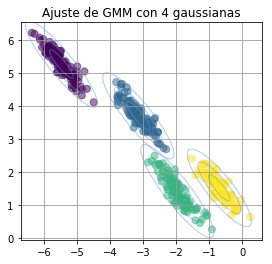

Ajuste de GMM con 5 gaussianas.
+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |       -978.96     |
|   2  |       -951.16     |
|   3  |       -933.27     |
|   4  |       -914.90     |
|   5  |       -894.66     |
|   6  |       -880.43     |
|   7  |       -873.31     |
|   8  |       -868.30     |
|   9  |       -862.92     |
|  10  |       -855.81     |
|  11  |       -844.27     |
|  12  |       -822.61     |
|  13  |       -786.12     |
|  14  |       -772.56     |
|  15  |       -770.86     |
|  16  |       -766.34     |
|  17  |       -751.12     |
|  18  |       -705.09     |
|  19  |       -664.74     |
|  20  |       -631.67     |
|  21  |       -624.12     |
|  22  |       -623.96     |
|  23  |       -623.73     |
|  24  |       -623.27     |
|  25  |       -622.16     |
|  26  |       -620.67     |
|  27  |       -619.77     |
|  28  |       -618.50     |
|  29  |       -616.93     |
|  30  |       -616.25     |
|  31  |   

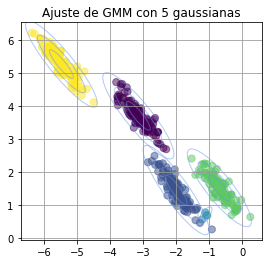

Ajuste de GMM con 6 gaussianas.
+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |       -937.76     |
|   2  |       -851.68     |
|   3  |       -791.49     |
|   4  |       -775.73     |
|   5  |       -773.82     |
|   6  |       -771.96     |
|   7  |       -768.99     |
|   8  |       -763.49     |
|   9  |       -752.63     |
|  10  |       -735.51     |
|  11  |       -721.34     |
|  12  |       -709.73     |
|  13  |       -692.06     |
|  14  |       -658.01     |
|  15  |       -632.84     |
|  16  |       -629.00     |
|  17  |       -627.38     |
|  18  |       -626.30     |
|  19  |       -625.46     |
|  20  |       -624.70     |
|  21  |       -623.82     |
|  22  |       -622.61     |
|  23  |       -620.77     |
|  24  |       -618.56     |
|  25  |       -617.34     |
|  26  |       -616.50     |
|  27  |       -616.32     |
|  28  |       -616.14     |
|  29  |       -615.87     |
|  30  |       -615.28     |
|  31  |   

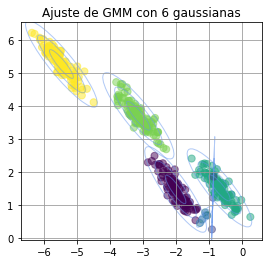

In [7]:
for k in range(2, 7):
    print('Ajuste de GMM con %d gaussianas.' % k)

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    # Ajustar modelo GMM a X.
    gmm1 = gmm_EM(X, k)


    # Calcular la etiqueta (un entero entre 0 y k-1) para cada elemento de X.
    labels_gmm = np.argmax(gmm1["probs"], axis=1) 


    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    plot_gmm(X, gmm1, labels_gmm)
    plt.title('Ajuste de GMM con %d gaussianas' % k )
    plt.show()

## Parte (d): Análisis de los ajustes

Teniendo en cuenta los resultados cualitativos y la tabla armada en la parte anterior variando el número de componentes (Gaussianas) ¿cuál sería el número de componentes a utilizar?

**Respuesta:** 

El número de componentes a usar es 4, dado que a partir de ese valor el valor de la verosimilitud varía más lentamente (comienza a converger), indicando que 4 es el valor óptimo. Se obtien un buen valor de verosimiltud ahorrando en interaciones necesarias para entrenar.

# GMM como un estimador de densidad

Además de ser un algotirmo de clustering, GMM es fundamentalmente un algoritmo de *estimación de la densidad*.
Es decir, el resultado del ajuste de un GMM a unos datos es un modelo probabilístico que describe la su distribución.

En esta parte del ejercicio evaluaremos cómo utilizar un GMM para generar nuevos datos a partir del modelo entrenado. El esquema que se sigue es el siguiente:

- Generación de nuevas muestras (Parte (g))
- Comparar el modelo ajustado a las nuesvas muestras con el modelo original (Parte (h))

## Parte (e): Generar nuevas muestras de GMM

Completar la función `generar_muestras_gmm`. La función debe generar `Nm` puntos distribuidos según el modelos `gmm`. 

Puede ser de utilidad la función `generar_muestras_gaussiana_multivariada()` con la siguiente definición:
<pre>
def generar_muestras_gaussiana_multivariada(mean_, Sigma_, N=100):
    '''
    Función para generar N muestras de una Gaussiana multivariada de dimensión
    d usando la descomposición de Cholesky.
    
    Entrada: 
        mean_: Arreglo de tamaño (1,d) que contiene la media.
        Sigma_: Arreglo de tamaño (dxd) que contiene la matriz de covarianza.
        n: Número de puntos a generar.
        
    Salida: 
        X: Arreglo de tamaño (Nxd).
    '''
</pre>

In [11]:
def generar_muestras_gmm(gmm, Nm=100):
    '''
    Entrada:
        gmm: Modelos de Mezcla de Gaussianas como un diccionario generado por 
             la función gmm_EM().
        Nm: Número de nuevas muestras a generar.

    Salida:
        Xgen: Matriz de tamaño Nmxd con los datos generados.
    '''

    # Obtener el número de componentes del GMM y la dimensión de los datos.
    Ng = gmm['means'].shape[0]
    d = gmm['means'][0].shape[0]

    # Calcular el número de datos de cada componente, Ns (vector de tamaño Ng).
    Ns = np.around(Nm * gmm['weights']).astype(int)
    
    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    
    # Generar Nm datos a partir de la generación de Ns[i] datos para cada 
    # una de las Ng componentes (0 <= i < Ng).
    Xgen = np.zeros((0,d))
    
    for i in range(Ng):
        print(f"Generando muestras para clase {i}") # Mensaje para debugueo
        Xgen_i = generar_muestras_gaussiana_multivariada(mean_=gmm["means"][i], 
                                                         Sigma_=gmm["covars"][i],
                                                         N=Ns[i])
        Xgen = np.concatenate((Xgen, Xgen_i))
    
    
    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return Xgen

Primero se ajusta un modelo GMM `gmm_org` con $N_g=4$ a los datos de trabajo. Luego se generarán nuevas muestras con este modelo.

In [9]:
# Ajustar modelo GMM con Ng=4.
gmm_org = gmm_EM(X, Ng=4)

+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |      -1044.82     |
|   2  |       -989.67     |
|   3  |       -921.27     |
|   4  |       -876.91     |
|   5  |       -863.69     |
|   6  |       -850.59     |
|   7  |       -831.43     |
|   8  |       -800.93     |
|   9  |       -778.26     |
|  10  |       -774.55     |
|  11  |       -773.11     |
|  12  |       -766.31     |
|  13  |       -750.85     |
|  14  |       -732.46     |
|  15  |       -718.30     |
|  16  |       -708.20     |
|  17  |       -696.87     |
|  18  |       -679.40     |
|  19  |       -654.47     |
|  20  |       -629.50     |
|  21  |       -623.84     |
|  22  |       -623.84     |
+------+-------------------+


Se generan $N_m=400$ muestras con el método `generar_muestras_gmm` implementado y el modelo `gmm_org` recién ajustado.

Generando muestras para clase 0
Generando muestras para clase 1
Generando muestras para clase 2
Generando muestras para clase 3


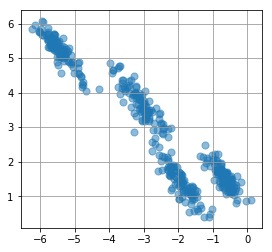

In [17]:
Nm = 400
Xgen = generar_muestras_gmm(gmm_org, Nm=Nm)
plot_scatter(Xgen[:, 0], Xgen[:, 1])

## Parte (f): Comparar GMM de datos generados y originales

En esta sección se hace un ajuste de un modelo GMM a los datos generados `Xgen`. El objetivo es comparar los parámetros obtenidos en el ajuste con los del modelo GMM original. Si los datos generados cumplen con los parámetros del modelo de entrada, los parámetros del modelo de salida deben ser similares.

+------+-------------------+
| iter | log verosimilitud |
+------+-------------------+
|   1  |      -1011.88     |
|   2  |       -993.62     |
|   3  |       -971.01     |
|   4  |       -953.50     |
|   5  |       -942.12     |
|   6  |       -930.31     |
|   7  |       -904.89     |
|   8  |       -878.44     |
|   9  |       -863.90     |
|  10  |       -841.81     |
|  11  |       -798.74     |
|  12  |       -785.20     |
|  13  |       -779.01     |
|  14  |       -768.28     |
|  15  |       -743.74     |
|  16  |       -701.11     |
|  17  |       -686.95     |
|  18  |       -682.76     |
|  19  |       -679.15     |
|  20  |       -675.96     |
|  21  |       -672.96     |
|  22  |       -669.70     |
|  23  |       -665.58     |
|  24  |       -660.29     |
|  25  |       -654.15     |
|  26  |       -648.47     |
|  27  |       -644.82     |
|  28  |       -642.81     |
|  29  |       -641.79     |
|  30  |       -641.54     |
|  31  |       -641.50     |
|  32  |      

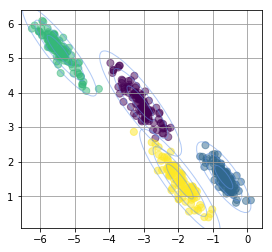

In [18]:
# Ajustar modelo GMM a los datos generados.
gmm_gen = gmm_EM(Xgen, Ng=4, semilla=42)

# Visualizar el ajuste.
labels_gmm_gen = np.argmax(gmm_gen['probs'], axis=1)
plot_gmm(Xgen, gmm_gen, labels_gmm_gen)

A modo de verificación se muestran los centro de las Gaussianas obtenidas en el modelo `gmm_gen` con el original `gmm_org`.

In [19]:
print('Centros de gaussianas del modelo original:')
print(gmm_org['means'])
print('\nCentros de gaussianas del modelo original:')
print(gmm_gen['means'])

Centros de gaussianas del modelo original:
[[-5.47847587  5.28447269]
 [-3.14649333  3.71531266]
 [-1.96624845  1.43299665]
 [-0.69273432  1.53151934]]

Centros de gaussianas del modelo original:
[[-3.09043835  3.68392994]
 [-0.68286569  1.55123347]
 [-5.43868712  5.21845463]
 [-1.95413623  1.42518191]]


Las componentes no tienen que quedar en el mismo orden en ambos modelos. Para cuantificar automáticamente la distancia entre los centros de las Gaussianas primero se ordenan por la primera coordenada (en este caso es suficiente). Completar la siguiente celda para calcular las distancias entre estos centros, y la diferencia en los pesos calculados.

In [20]:
# Ordenar los centros de las gaussianas según la primera coordenada. Se
# almacenan los índices para ordenar los centros.
sorted_ind_gmm_org = np.argsort(gmm_org['means'][:, 0])
sorted_ind_gmm_gen = np.argsort(gmm_gen['means'][:, 0])

#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

# Calcular las distancias entre los centros de las gaussianas a partir del
# ordenamiento obtenido.
centros_gmm_org_ord = gmm_org['means'][sorted_ind_gmm_org]
centros_gmm_gen_ord = gmm_gen["means"][sorted_ind_gmm_gen]
distancia_entre_componentes = np.linalg.norm(centros_gmm_gen_ord-centros_gmm_org_ord, ord=2, 
                                             axis=1)
 




# Calcular el error entre los pesos de las gaussianas a partir del
# ordenamiento obtenido.

error_pesos_componentes = gmm_org["weights"][sorted_ind_gmm_org]-gmm_gen["weights"][sorted_ind_gmm_gen]
                                         


#####################################################
####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

print('Distancia entre centros de las Gaussianas:')
print(np.array_str(distancia_entre_componentes, precision=2, suppress_small=False))

print('\nError en pesos de las Gaussianas:')
print(np.array_str(error_pesos_componentes, precision=2, suppress_small=False))


Distancia entre centros de las Gaussianas:
[0.08 0.06 0.01 0.02]

Error en pesos de las Gaussianas:
[-2.55e-06 -2.70e-04  2.73e-04 -4.75e-07]


# Generación de datos sintéticos como muestras de un modelo aprendido

En esta parte del ejercicio se evaluará la generación de datos sintéticos como muestras de un modelo GMM aprendido. Se utilizará la implementación de GMM disponible en la biblioteca scikit-learn.

Se cargan un conjunto de imágenes de dígitos. Cada imagen de 8x8 píxeles se considera como un dato de dimensión 64. Se ajusta un modelo GMM a este conjunto de datos variando el número de componentes.

Son 1797 dígitos de dimensión 64 cada uno.


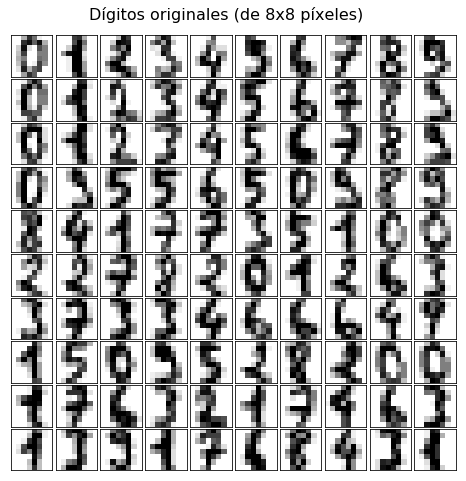

In [21]:
# Cargan los datos de dígitos, se muestran sus dimensiones y 100 de ellos.
digitos = load_digits()
print('Son %d dígitos de dimensión %d cada uno.' %
      (digitos.data.shape[0], digitos.data.shape[1]))
plot_digits(digitos.data, title='Dígitos originales (de 8x8 píxeles)')

Se generan $Nm=100$ muestras de estos modelos GMM y se muestran las correspondientes imágenes sintéticas (no son datos reales tomados de los dígitos).

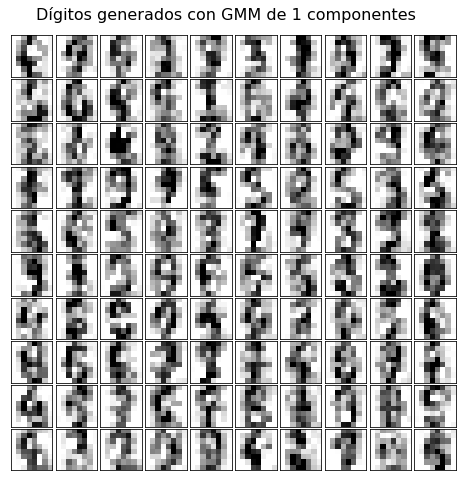

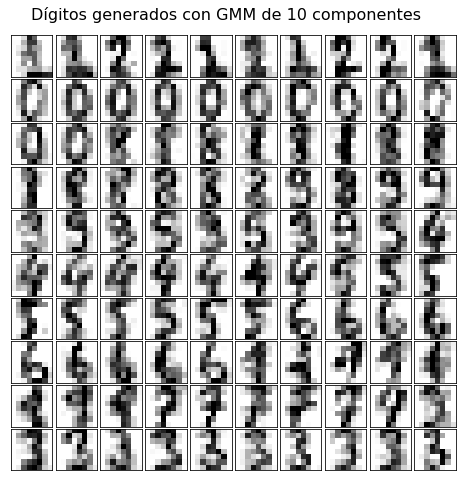

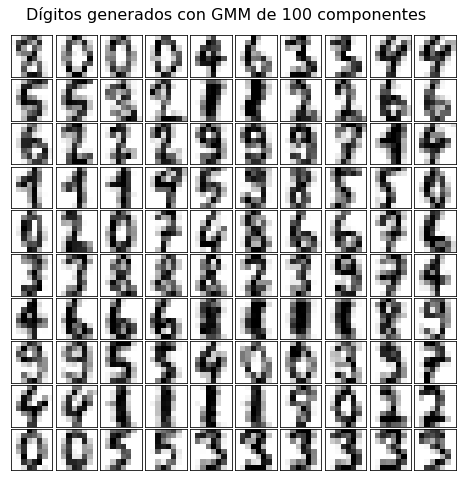

In [22]:
Nm = 100
for Ng in 1, 10, 100:

    # Se ajusta un modelo GMM con <Ng> componentes a los datos.
    gmm = GMM(Ng, covariance_type='full', random_state=0)
    gmm.fit(digitos.data)

    # Se generan Nm nuevos datos sorteados del modelo GMM ajustado.
    digitos_new = gmm.sample(Nm)

    # Visualizar los datos sintéticos generados.
    plot_digits(digitos_new[0], title='Dígitos generados con GMM de %d componentes' % Ng)

## Parte (g): Evaluación de los datos generados

Comparar cualitativamente los conjuntos de números generados a partir de los modelos variando el número de componentes. ¿Cómo se explica esta calidad respecto a la cantidad de componentes del modelo GMM en cada caso?

**Respuesta:**

Mientras mayor la cantidad de componentes más nítidos y similiares parecen ser los datos generados a los números reales. Esto es coherente con lo observado más arriba, donde la verosimiltud aumentaba con el número de componentes. Mientras más componenetes se tienen, más fino se ajusta el modelo de probabilidad a la realidad, por lo que es razonable que 100 componentes tenga un desempeño mejor que 10. 

Desempeño en cada caso:
1. **1 componente**: teniendo una sola componente, los digitos apenas pueden distinguirse y parecen mas bien un borron con algunas zonas más negras.
2. **10 componentes**: con 10 componentes ya es posible distinguir algunos números, pero aún se observan algunos borroneados e mezclados entre ellos. Por ejemplo, el numero de abajo a la derecha no se entiende si es un 3 o un 8.
3. **100 componentes**: con 100 componentes es posible distinguir claramente los digitos, al menos casi que al mismo nivel que los datos originales. Esto se debe a que con 100 componentes se tiene más información sobre cada clase, por lo se obtienen mejores resultados.